In [52]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2

import os

import importlib
import CornerExtractor
importlib.reload(CornerExtractor)

<module 'CornerExtractor' from '/mnt/D/University/Thesis/CornerExtractor.py'>

In [53]:
CE = CornerExtractor.CornerExtractor()

In [54]:
i = 1
# i = 10

In [55]:
# image_file_path = "/home/mostafaelfaggal/ChessReD/Chess Recognition Dataset (ChessReD)_2_all/chessred2k/images/87/G087_IMG035.jpg"
image_file_path = "data/image1.jpg"
# image_file_path = f"data/data2/image{i}.jpg"

img = np.array(Image.open(image_file_path))

In [61]:
# %%timeit

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# img_blur = cv2.GaussianBlur(img_gray, (3, 3), 1)
CE.setImg(img_gray)
CE.apply()

In [62]:
i += 1
i

3

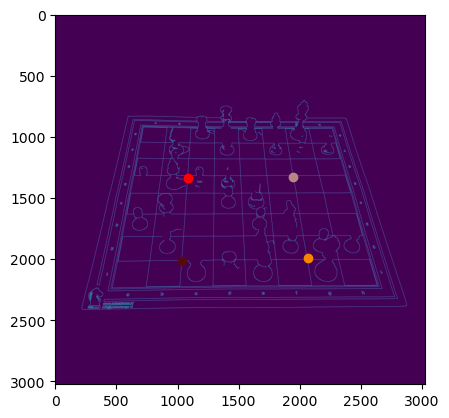

In [68]:
# CE.overlayIntersections(CE.compute_cross_centrals())
plt.imshow(CE.edges);
plt.scatter(CE.oriented_centrals[0,0], CE.oriented_centrals[0,1], c='red'); # red - tl
plt.scatter(CE.oriented_centrals[1,0], CE.oriented_centrals[1,1], c='#bb8588'); # pink - tr
plt.scatter(CE.oriented_centrals[2,0], CE.oriented_centrals[2,1], c='#FB8500'); # orange - br
plt.scatter(CE.oriented_centrals[3,0], CE.oriented_centrals[3,1], c='#540b0e'); # brown - bl

(array([[ 5.82161217e+00, -1.43474767e+00,  7.43708039e+02],
        [-1.01617888e-01,  2.35793475e+00,  8.58435964e+02],
        [-6.14959398e-10, -1.07994220e-03,  1.00000000e+00]]),
 tensor(10.2060))

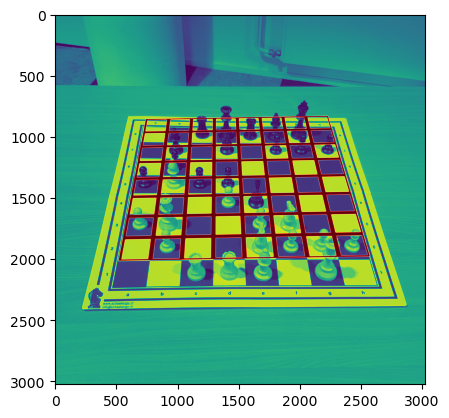

In [64]:
M, img_warpped, error = CE.fitBoard()
plt.imshow(CE.img);
# plt.imshow(CE.edges);
plt.imshow(img_warpped, cmap='Reds', alpha=img_warpped);
M, error

(tensor(11.7352),
 array([[ 6.02999832e+00, -1.48610459e+00,  7.22773816e+02],
        [-1.05255080e-01,  2.44233779e+00,  9.67318596e+02],
        [-4.30260716e-10, -1.11859883e-03,  1.00000000e+00]]))

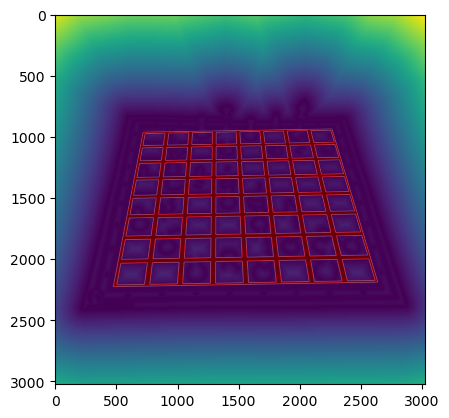

In [67]:
testFor = torch.tensor([
    [64, 96],
    [192, 96],
    [192, 224],
    [64, 224],
], dtype=torch.float32)

H, W = CE.getImageSize()
# H,W = 480,640
M , warp = CornerExtractor.reverseWarp(CE.oriented_centrals, testFor, (W, H))
dist_transform = cv2.distanceTransform(255-CE.edges, cv2.DIST_L2, 5)
plt.imshow(dist_transform);
# plt.imshow(img);
plt.imshow(warp, cmap='Reds', alpha=warp);
# CornerExtractor.calc_error(torch.tensor(CE.edges, dtype=torch.float32)/255, warp)
CornerExtractor.calc_error(torch.tensor(dist_transform), warp), M

In [57]:
dist_transform.min()

0.0

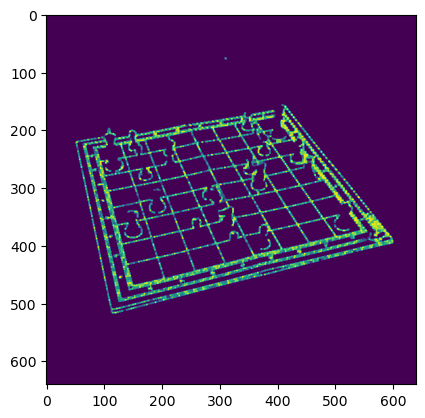

In [ ]:
resized_image = cv2.erode(cv2.dilate(cv2.resize(CE.edges, (640, 640)), np.ones((3,3)), iterations=2), np.ones((3,3)),iterations=1)/255
plt.imshow(resized_image);

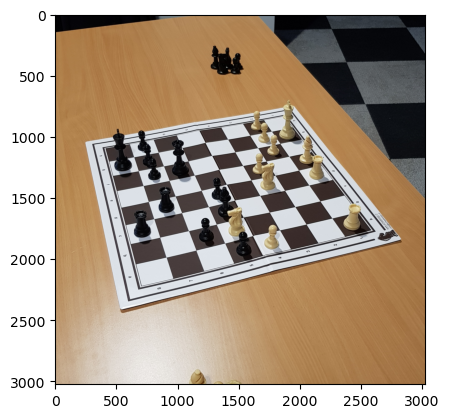

In [1054]:
plt.imshow(img);

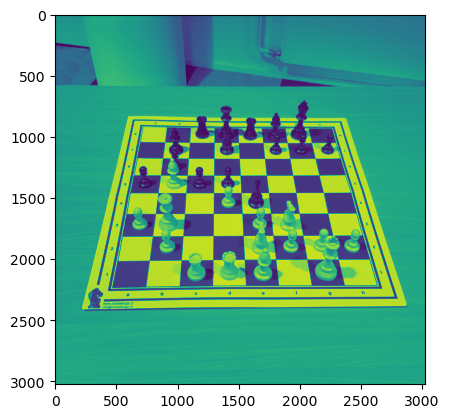

In [25]:
plt.imshow(CE.img);

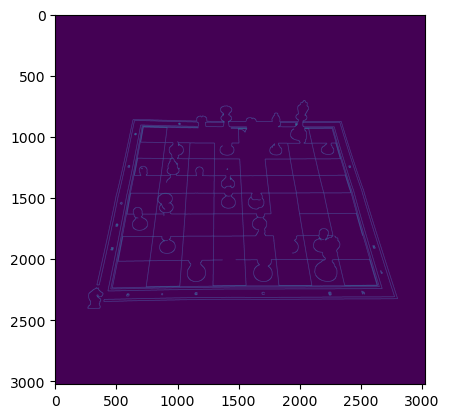

In [24]:
plt.imshow(CE.edges);

torch.Size([96, 2])


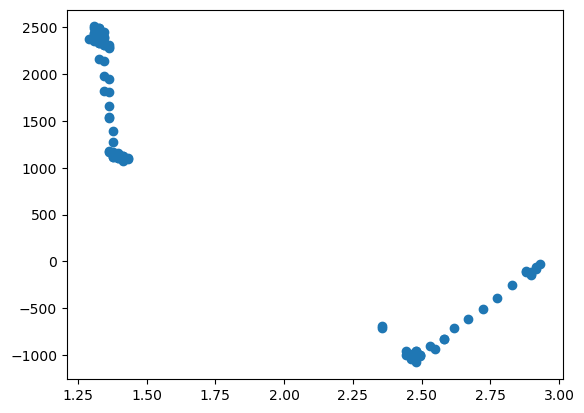

In [1057]:
CE.plotLinesGraph()

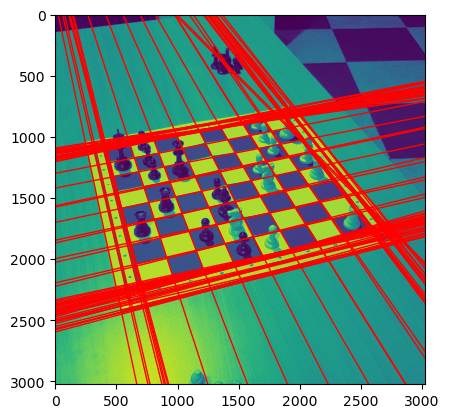

In [1058]:
CE.overlayLines()

In [1059]:
filtered_lines = CE.clustered_lines
filtered_lines.shape, CE.lines.shape

(torch.Size([33, 2]), torch.Size([96, 2]))

torch.Size([33, 2])


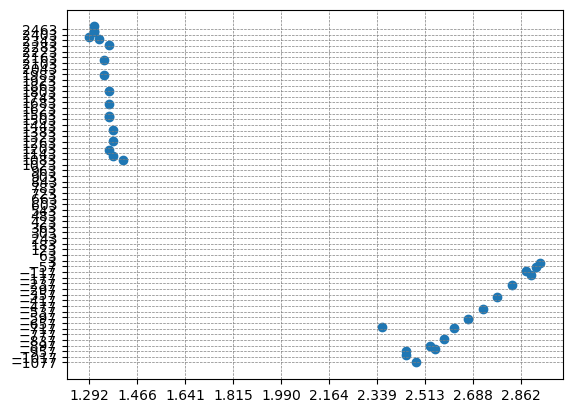

In [1060]:
CE.clustered_plotLinesGraph(True)

(torch.Size([96, 2]), torch.Size([33, 2]))

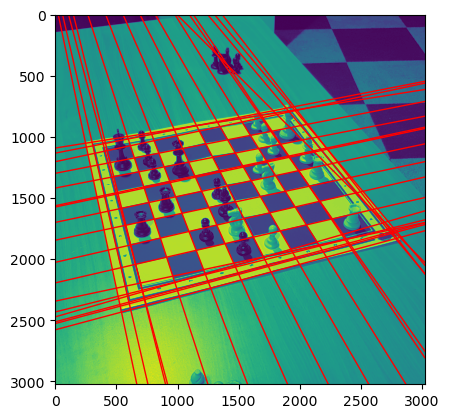

In [1061]:
CE.clustered_overlayLines()
CE.lines.shape, CE.clustered_lines.shape

torch.Size([272, 2])

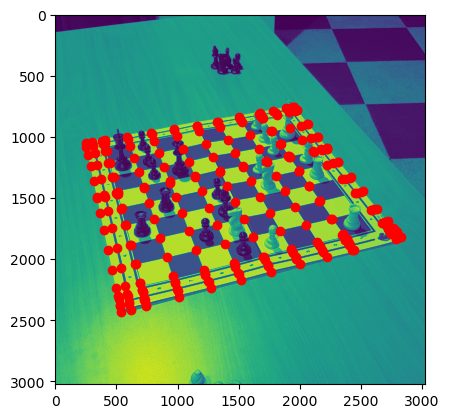

In [1062]:
CE.overlayIntersections()
CE.intersections.shape

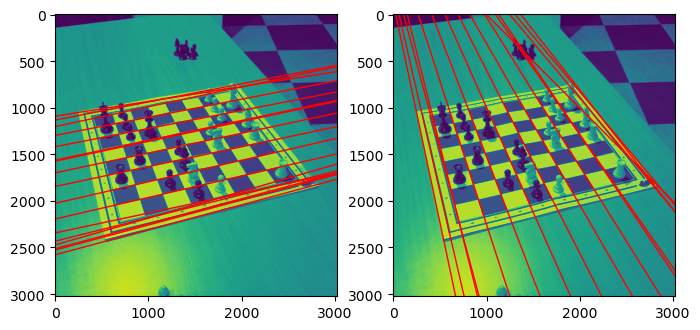

In [1063]:
CE.preview_bins()

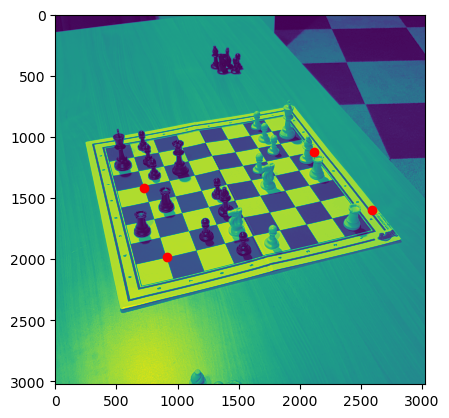

In [1064]:
CE.compute_cross_centrals(grid_size=5)
CE.overlayIntersections(CE.centrals)

(torch.Size([272, 2]), torch.Size([154, 2]))

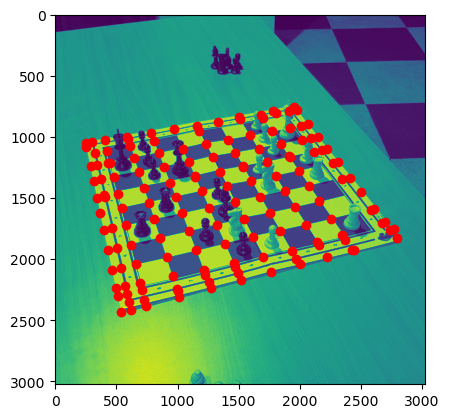

In [1065]:
deltas = (80,80)
CE.compute_clustered_intersections(deltas=deltas)
CE.overlayIntersections(CE.clustered_interesections)
CE.intersections.shape, CE.clustered_interesections.shape

In [1066]:
points_bins = CE.compute_intercepts()
len(points_bins), points_bins[0].shape, points_bins[1].shape

(2, torch.Size([17, 2, 2]), torch.Size([16, 2, 2]))

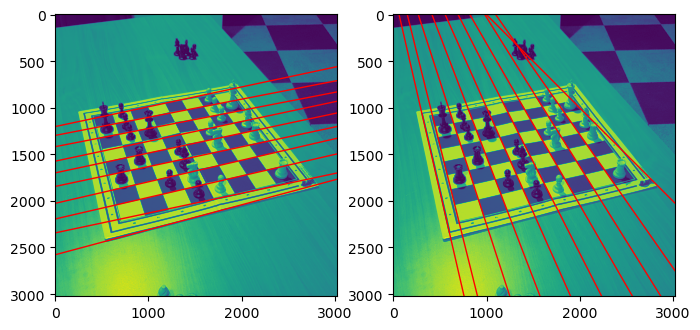

(tensor(1.3561), tensor(2.6896))

In [1067]:
CE.preview_bins(CE.compute_filtered_bins())
CE.square_filtered_bins[0][:,1].mean(), CE.square_filtered_bins[1][:,1].mean()

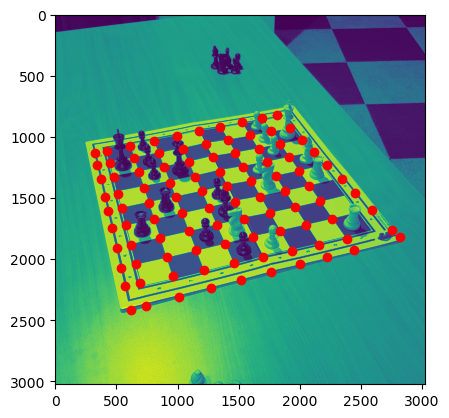

In [1068]:
CE.overlayIntersections(CE.compute_intersections(CE.compute_filtered_bins()))